# TAHAP MODELING - KAIZEN 2

Pada tahap pengklasifikasian ini menggunakan model CNN-LSTM


### 1. Import Libarary

In [1]:
import pickle
import numpy as np
import os
from matplotlib import pyplot as plt
import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

### 2. Import Dataset
ini adalah dataset hasil dari pengolahan sebelumnya dan disimpan dalam bentuk file pickle

In [2]:
data_dict = pickle.load(open('./data.pickle', 'rb'))

In [3]:
X = np.asarray(data_dict['sequences'])
y = np.asarray(data_dict['labels'])

### 3. Split dataset

In [4]:
y = to_categorical(y).astype(int)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((52, 15, 1662), (23, 15, 1662), (52, 5), (23, 5))

### 4. Membuat Callback Tensorbroad

In [7]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

### 5. Tahap Modeling Menggunakan CNN-LSTM


In [8]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(15,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [9]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [11]:
history= model.fit(X_train, y_train,
                   validation_data=(X_test,y_test), 
                   epochs=250, 
                   callbacks=[tb_callback])

Epoch 1/250
2/2 [==============================] - 5s 740ms/step - loss: 1.6210 - categorical_accuracy: 0.2500 - val_loss: 2.3799 - val_categorical_accuracy: 0.0000e+00
Epoch 2/250
2/2 [==============================] - 0s 162ms/step - loss: 2.0131 - categorical_accuracy: 0.2115 - val_loss: 1.6493 - val_categorical_accuracy: 0.1304
Epoch 3/250
2/2 [==============================] - 0s 146ms/step - loss: 1.6358 - categorical_accuracy: 0.1154 - val_loss: 1.6585 - val_categorical_accuracy: 0.1739
Epoch 4/250
2/2 [==============================] - 0s 113ms/step - loss: 1.6178 - categorical_accuracy: 0.2115 - val_loss: 1.5888 - val_categorical_accuracy: 0.2609
Epoch 5/250
2/2 [==============================] - 0s 118ms/step - loss: 1.7857 - categorical_accuracy: 0.3077 - val_loss: 1.6646 - val_categorical_accuracy: 0.2609
Epoch 6/250
2/2 [==============================] - 0s 117ms/step - loss: 1.7040 - categorical_accuracy: 0.1731 - val_loss: 1.6239 - val_categorical_accuracy: 0.1304
Epoch 

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 15, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 596,741
Trainable params: 596,741
Non-trai

### 6. Evaluasi Model 

Plot pengecekan akurasi


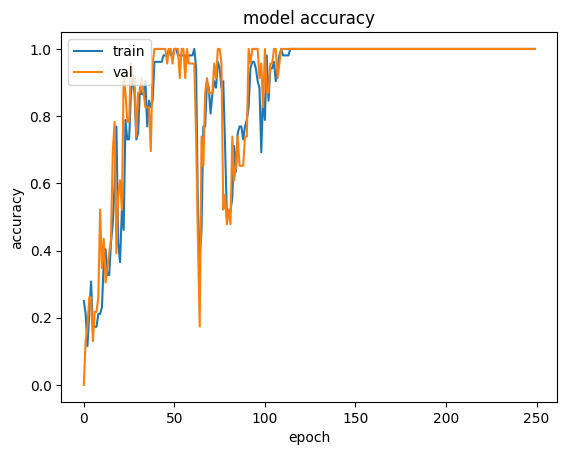

In [13]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Plot Pengecekan Loss


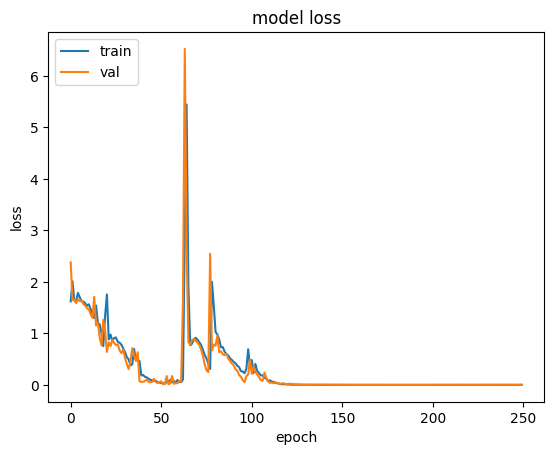

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 7. Menyimpan Model

In [15]:
model.save('model_LSTM_new.h5')